In [1]:
# Neural Network Prediction Exercise

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot


import statsmodels.graphics.tsaplots as tsa
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.diagnostic as statsd
from scipy.stats import ttest_ind
import matplotlib.ticker as ticker

plt.rcParams["figure.figsize"] = [16.4, 6.8] 

f2 = "sample/OW1mavg.csv" 
f = "differences/Diferencias SUN-WED.csv"
df = pd.read_csv(f)
df2 = pd.read_csv(f2) 
tr = 0.7

In [71]:
df2.columns

Index(['date', 'CUA', 'FAC', 'MER', 'MON', 'PED', 'SAG', 'TAH', 'TLA', 'UIZ',
       'XAL'],
      dtype='object')

In [72]:
trs = np.int(np.floor(len(df)*tr))

In [73]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  1 04:35:59 2019

@author: rodrigo
"""
from sortedcontainers import SortedList, SortedDict, SortedSet
import numpy as np

def getLongestSequence(pd,cols, holes = False):
    ixs_offsets = SortedList([])
    i=0
    c = 0
    bix = 0
    offset = -1    
    ix = -1
    tol = 0

    data = pd
    ndata= data.shape[0]
    msng = (data.loc[:,cols].iloc[i].isnull().values.any())
    
    if (msng == holes):
        c = 1
        ix = i

    for i in range(1,ndata):
        
        if (i%10000)==0 or (i==ndata): print(str(100.0*(i)/ndata) + "%")
        
        # false: cuando no hay valores nulos
        #true: hay valores nulos
        #modificar para que false signifique que hay a lo mas un tol valores nulos
        
        renglon = (data.loc[:,cols].iloc[i-1].isnull())
        if np.sum(renglon == True) <= tol:
            msng_0 = False
        else:
            msng_0 = True
        
        renglon = (data.loc[:,cols].iloc[i].isnull())
        if np.sum(renglon == True) <= tol:
            msng_1 = False
        else:
            msng_1 = True
            
       # msng_0 = (data.loc[:,cols].iloc[i-1].isnull().values.any())            
 #       msng_1 = (data.loc[:,cols].iloc[i].isnull().values.any())

        if (msng_1 == (holes)) and (msng_0 == (not holes)):
            c = 1
            ix = i
    
        if (msng_1 == (holes) and (msng_0 == holes)):
            c += 1
            if i == (ndata-1):
#                print("End of TS")
#                print("starting ix: " + str(ix))
#                print("offset:" + str(c))
                bix = ix
                offset = c
                
#       if (msng_1 == True) and (msng_0 == False) and (offset < c):
        if (msng_1 == (not holes)) and (msng_0 == holes):
            ixs_offsets.add((c,ix))
#            print("starting ix: " + str(ix))
#            print("offset:" + str(c))
            bix = ix
            offset = c
       
    #return [bix,offset]
    return ixs_offsets

NotImplementedError: use ``del sl[index]`` and ``sl.add(value)`` instead

In [167]:
h

SortedList([(1, 73), (1, 85), (1, 97), (1, 163), (1, 172), (1, 246), (1, 252), (1, 255), (1, 258), (1, 291), (1, 346), (1, 362), (1, 411), (1, 1701), (2, 69), (2, 119), (2, 148), (2, 153), (2, 194), (2, 240), (2, 243), (2, 248), (2, 260), (2, 1468), (2, 1703), (3, 76), (3, 91), (3, 130), (4, 80), (4, 189), (4, 197), (4, 340), (5, 355), (5, 403), (6, 165), (6, 266), (6, 301), (6, 348), (6, 1694), (7, 47), (7, 56), (7, 122), (7, 293), (7, 1471), (7, 1589), (7, 1686), (10, 275), (10, 365), (10, 1292), (10, 1662), (11, 202), (11, 309), (11, 1673), (11, 1706), (12, 135), (12, 1455), (13, 1155), (17, 100), (17, 748), (18, 321), (19, 801), (19, 1018), (20, 1101), (22, 1432), (23, 216), (23, 376), (28, 1480), (30, 1220), (31, 821), (31, 1122), (34, 766), (34, 1515), (34, 1550), (38, 1253), (50, 1169), (61, 1039), (62, 1597), (127, 1303), (163, 854), (334, 413)])

In [170]:
len(Y)

163

CUA


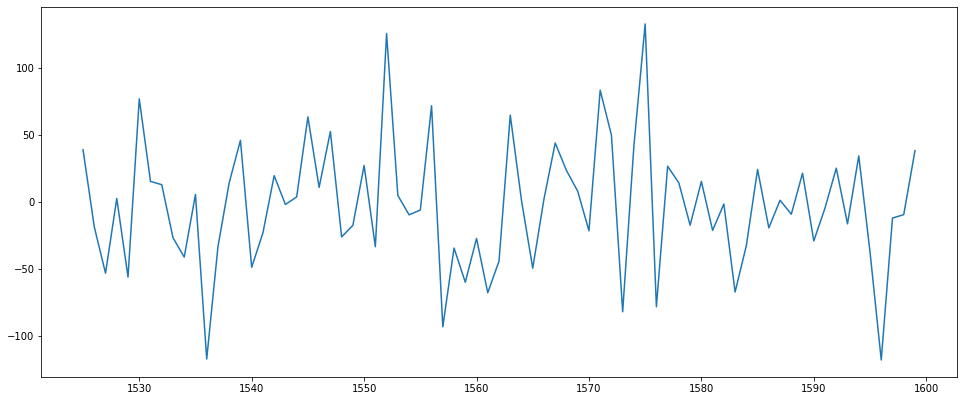

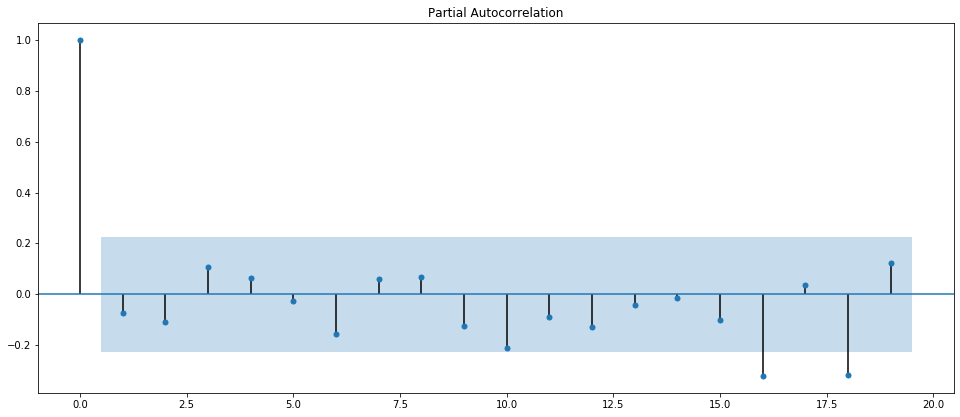

FAC


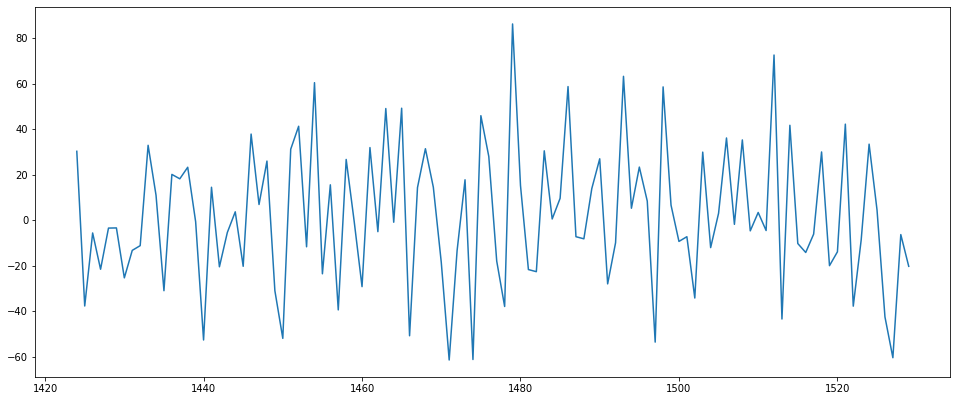

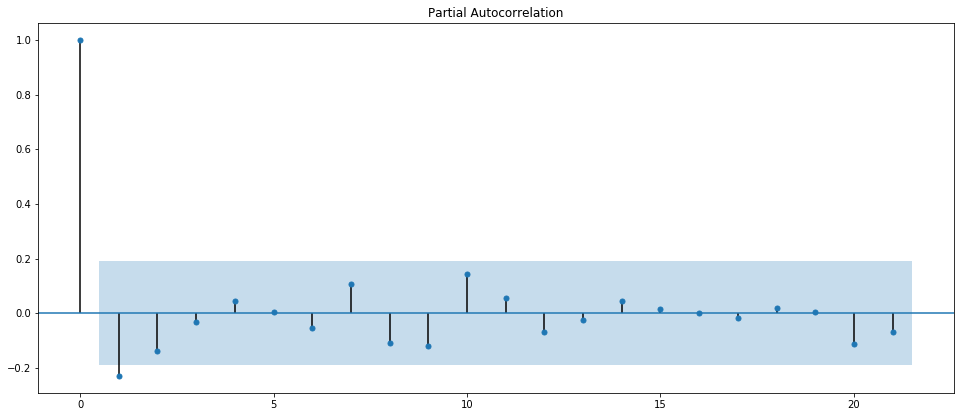

MER


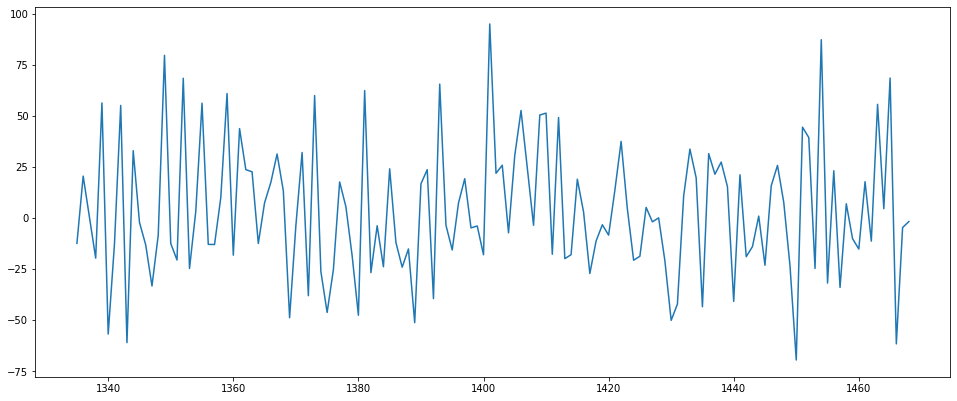

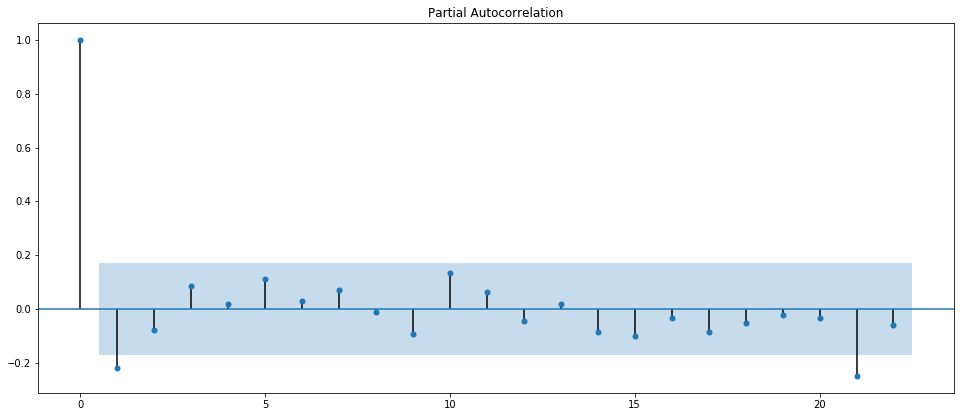

MON


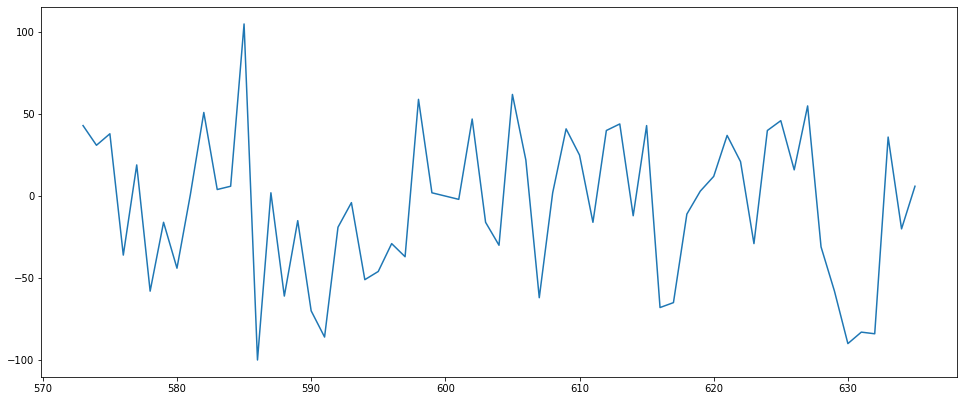

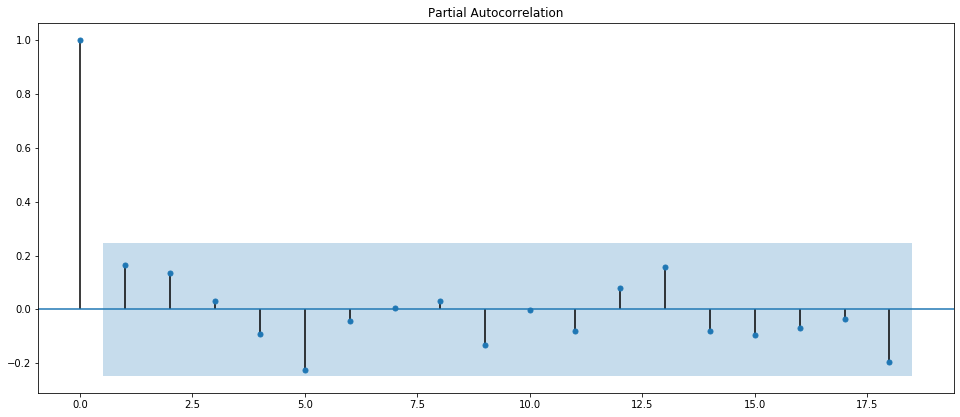

PED


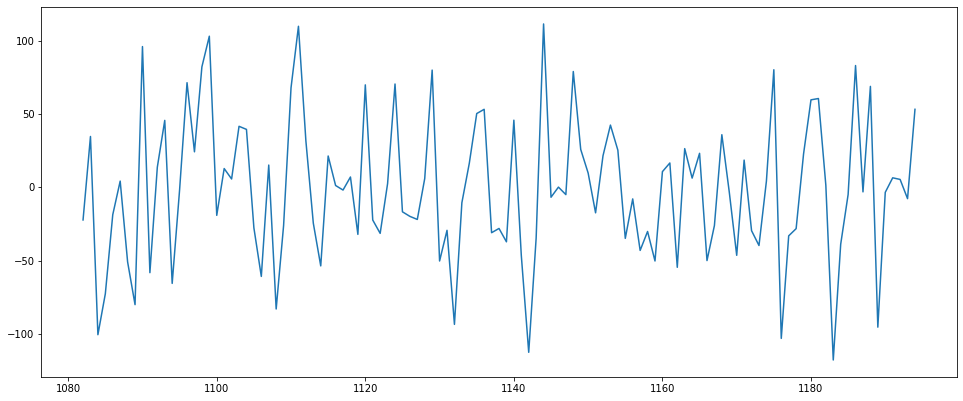

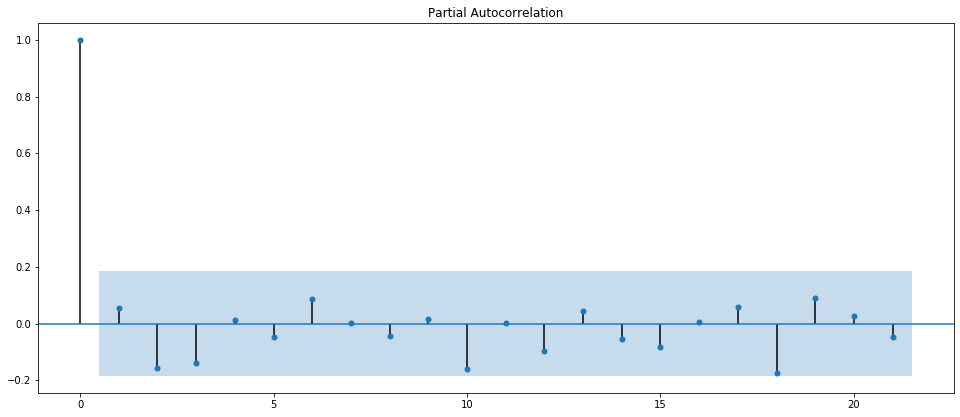

SAG


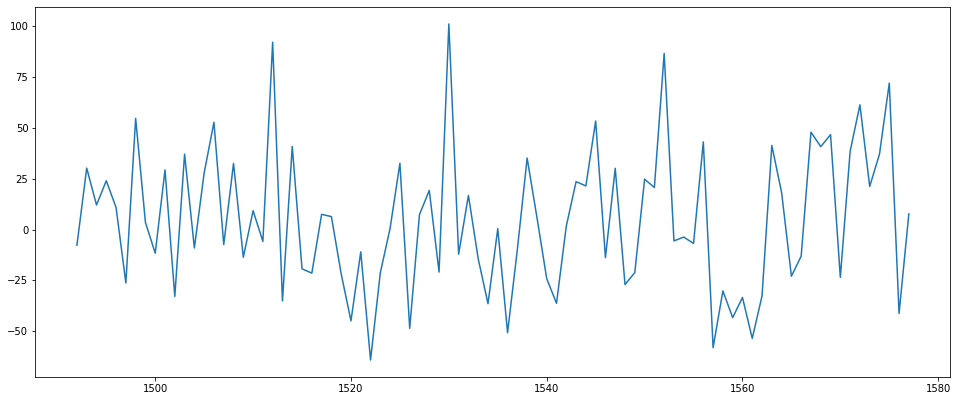

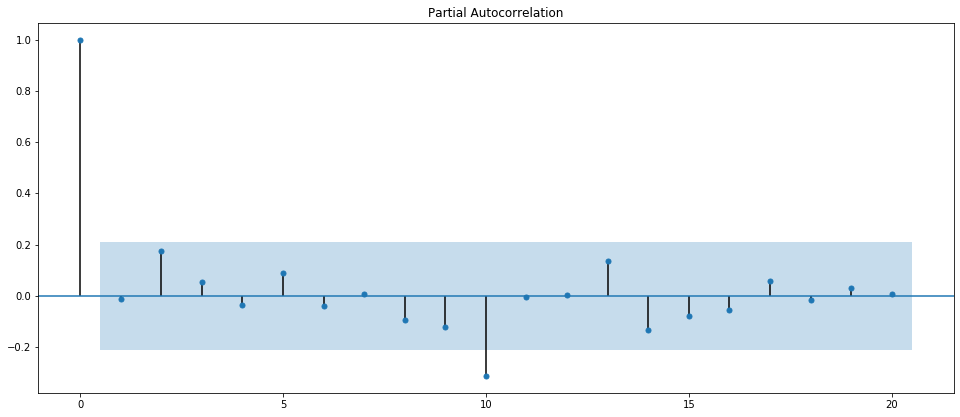

TAH


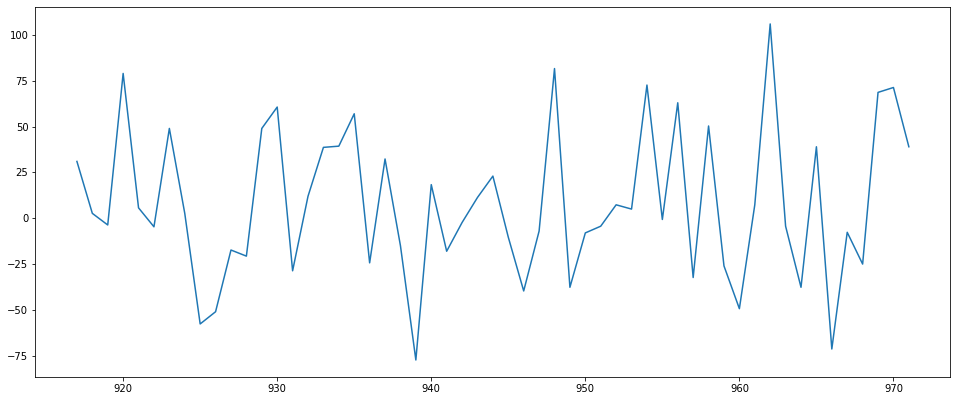

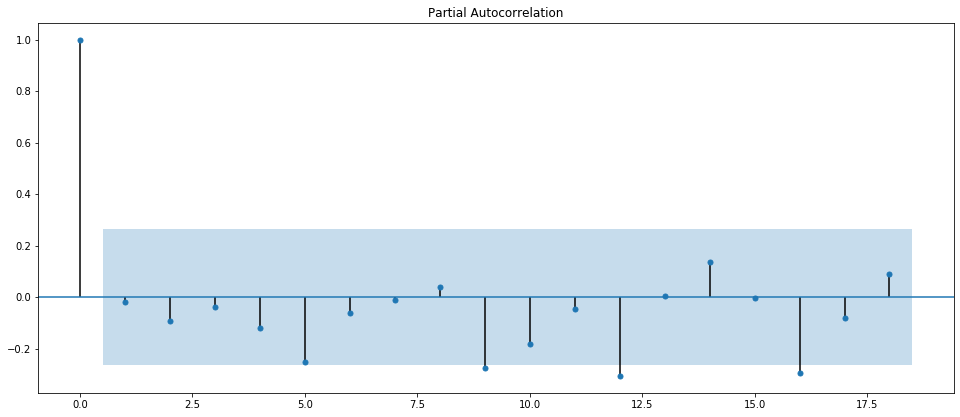

TLA


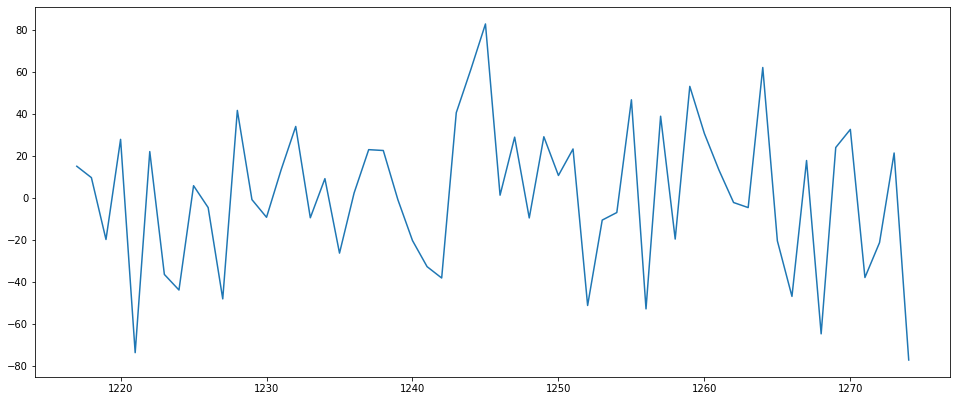

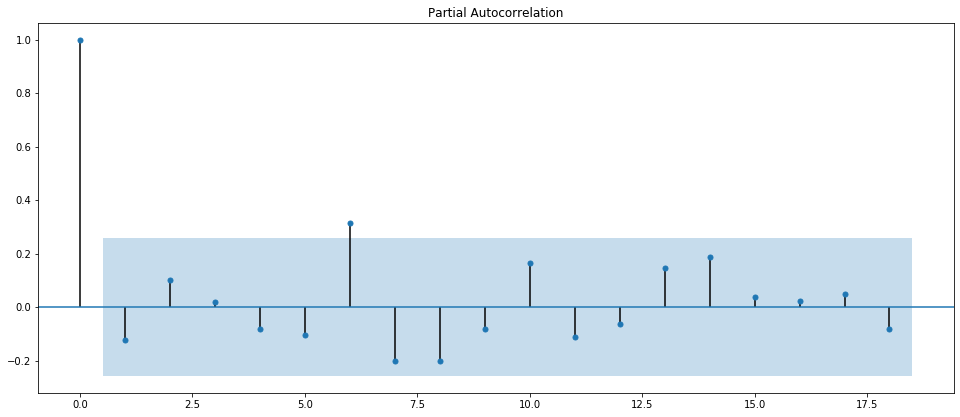

UIZ


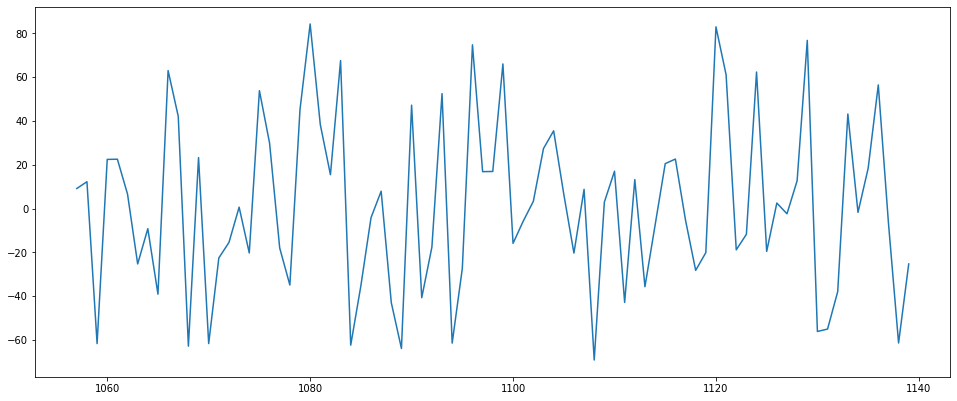

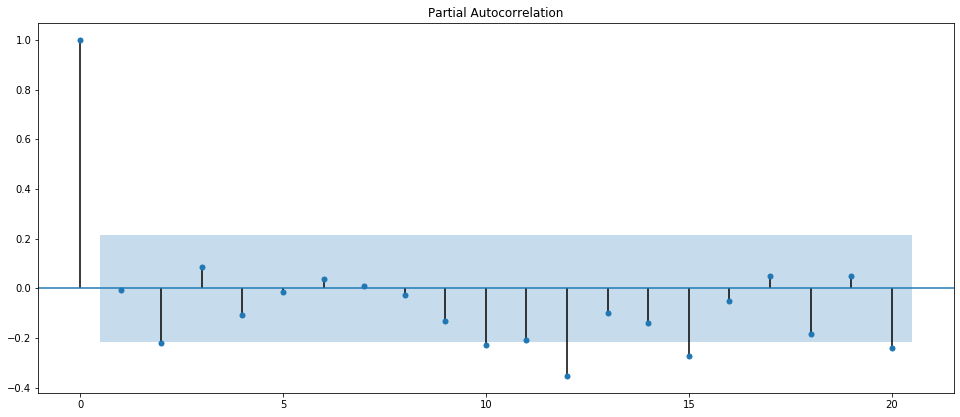

XAL


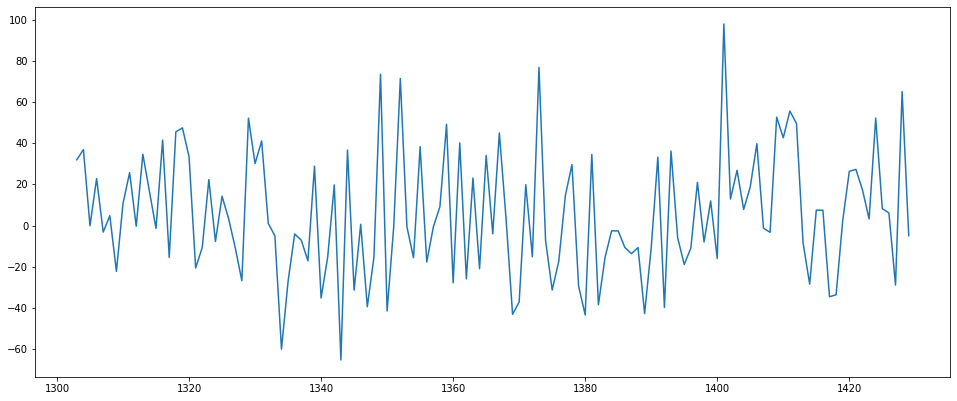

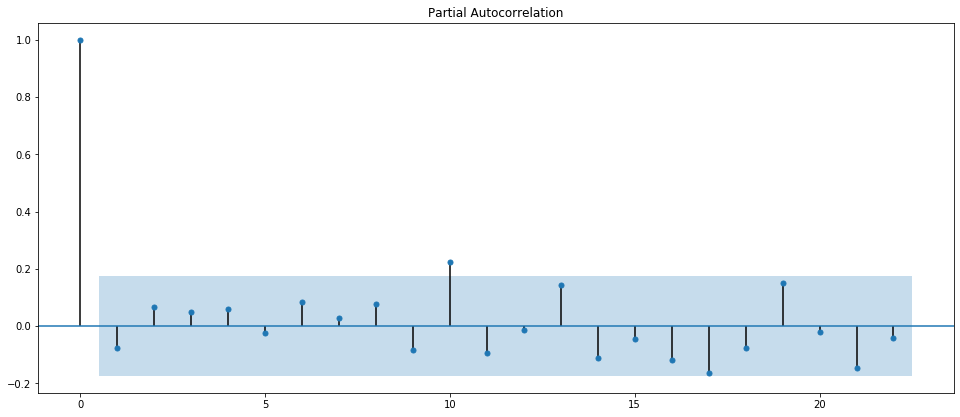

In [172]:
from scipy import stats

for c in np.array(df2.columns[1:11]):
    print(c)
    h = getLongestSequence(df,[c])
    ix = h[-3][1]
    os = h[-3][0]
    Y = df[c][ix:ix+os]
    
    X = range(len(Y))
    
    x_training = X[0:int(np.floor(len(X)))]
    y_training = Y[0:int(np.floor(len(Y)))]
    
    r = stats.theilslopes(y_training, x_training, 0.99)
    slope = r[0]
    intercept = r[1]
    
    trend = list(map(lambda x: intercept + slope*x, X))
    
  #  y =  np.array((y[2:-3]))-np.array(y[3:-2])
    
    plt.plot(Y-trend)
    tsa.plot_pacf(Y-trend)
    
    plt.show()

                               
                               
    

In [75]:
h_cua = getLongestSequence(df,['CUA'])
h_fac = getLongestSequence(df,['FAC'])


In [90]:
ix = h[-1][1]
os = h[-1][0]

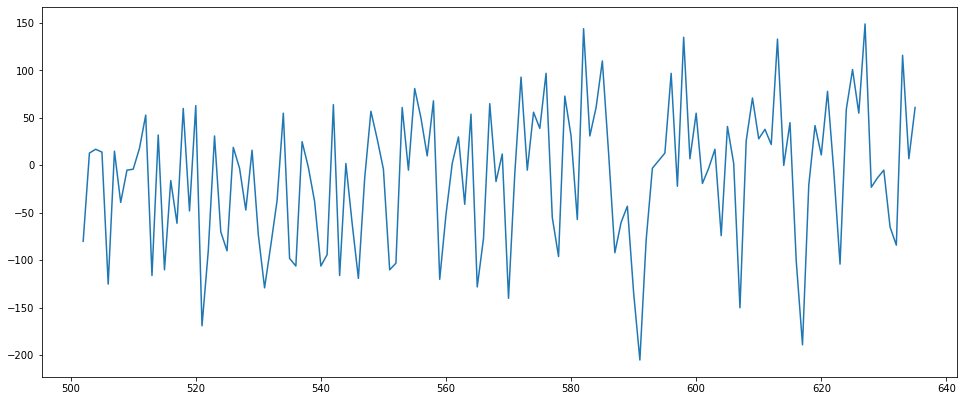

In [91]:
y = df["FAC"][ix:ix+os]
plt.plot(y)

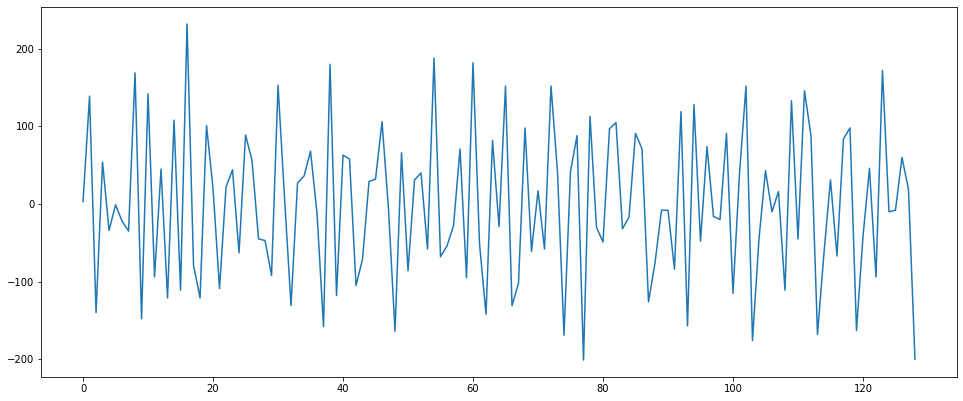

In [113]:

plt.plot(y)


In [ ]:
(y[:-1])

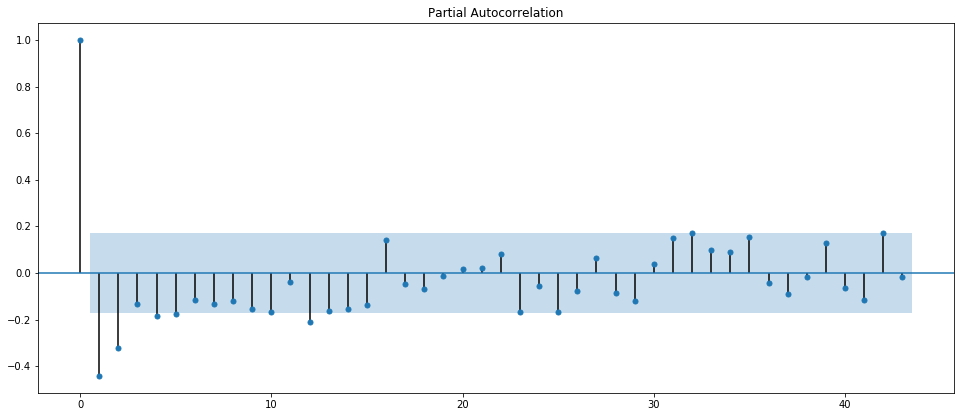

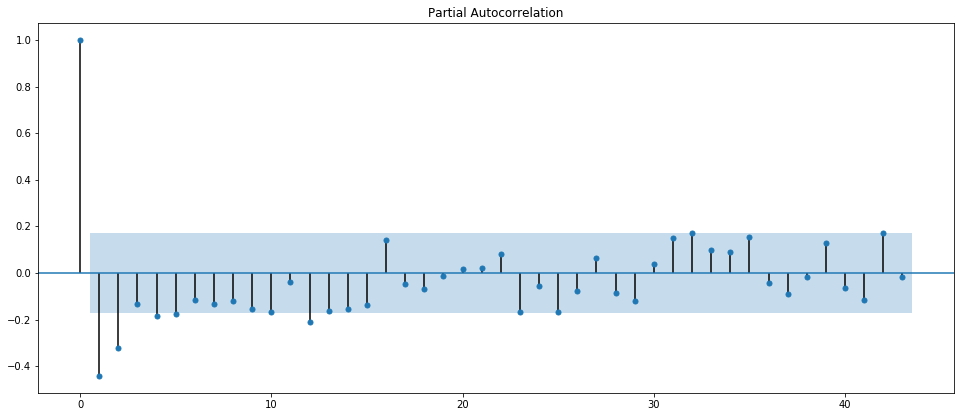

In [114]:
tsa.plot_pacf(y,lags = (int(len(y)/3)))

In [4]:
g = np.arange(len(df))//1
g2 = list(g[1:])
g2.append(g[-1])

In [5]:
df["group" ] = g2

In [6]:
groupedmean = df.groupby("group").mean()

In [7]:
groupedmean.columns[0:1]

Index(['CUA'], dtype='object')

CUA


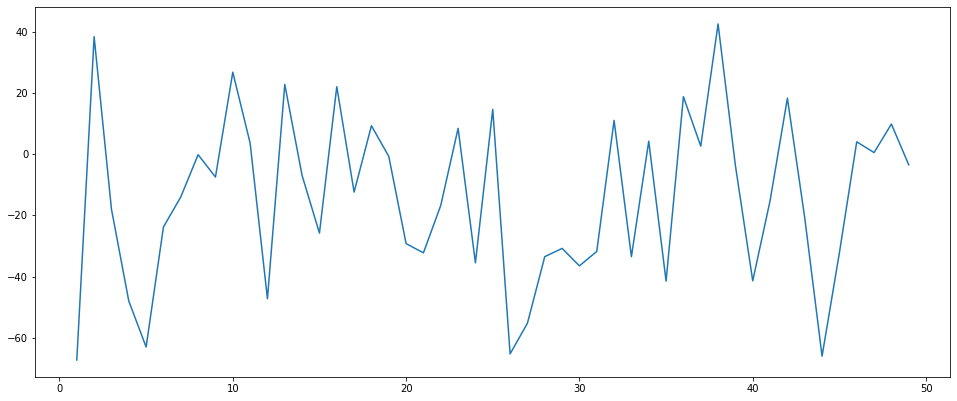

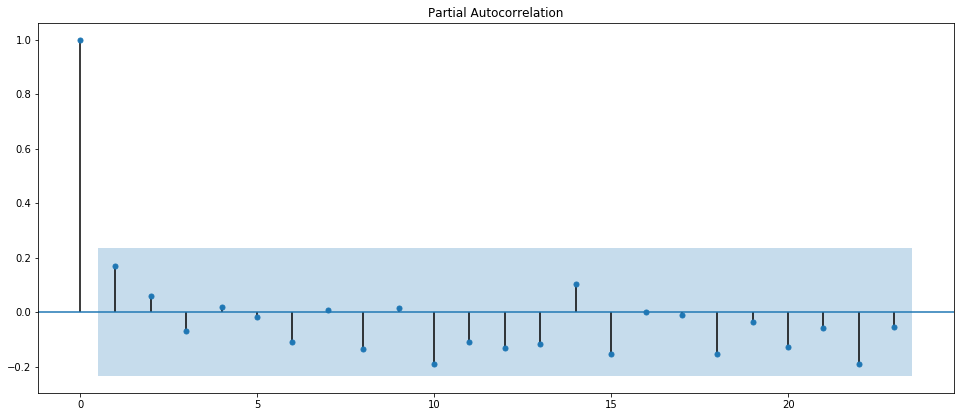

FAC


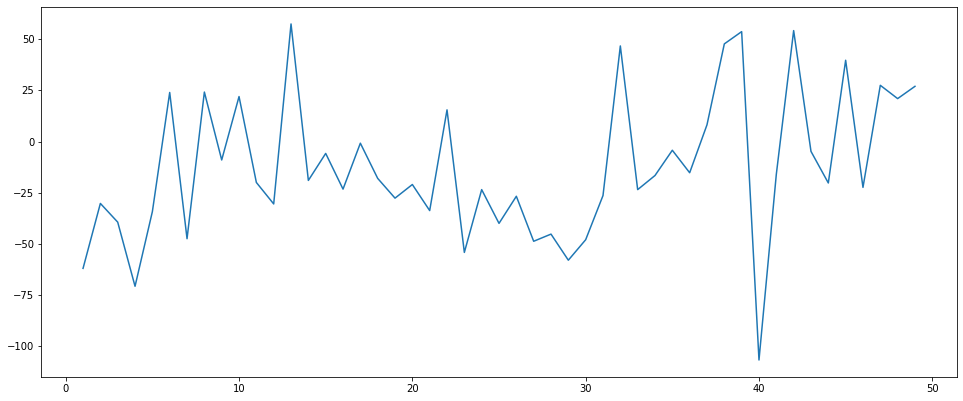

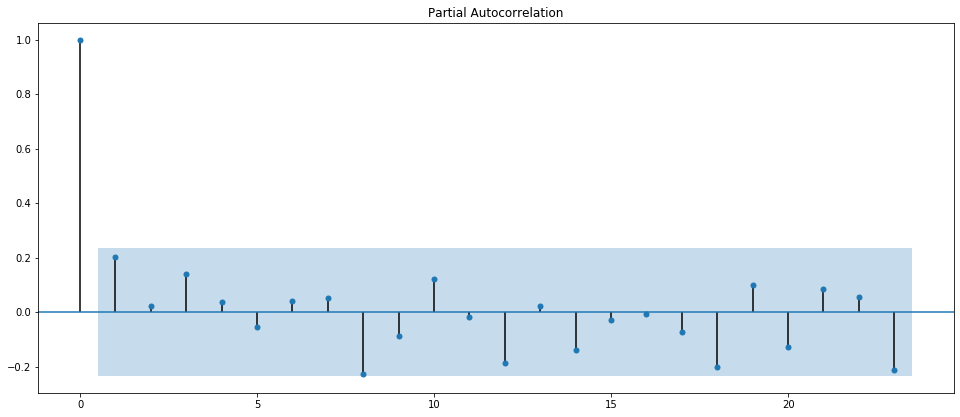

MER


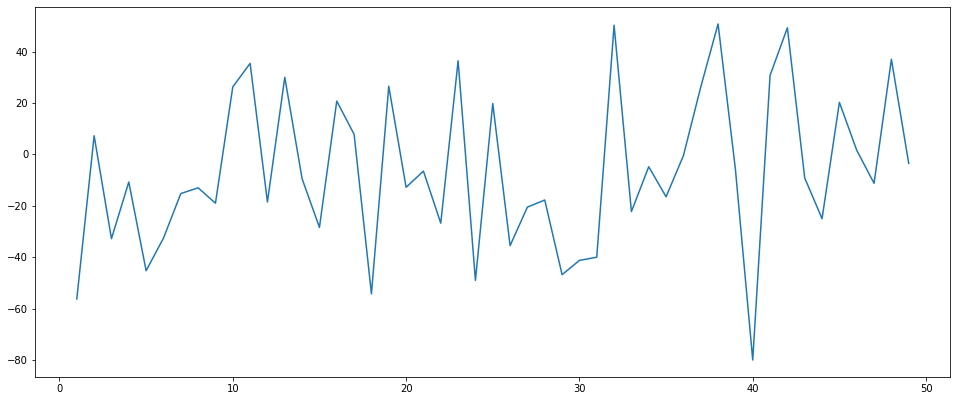

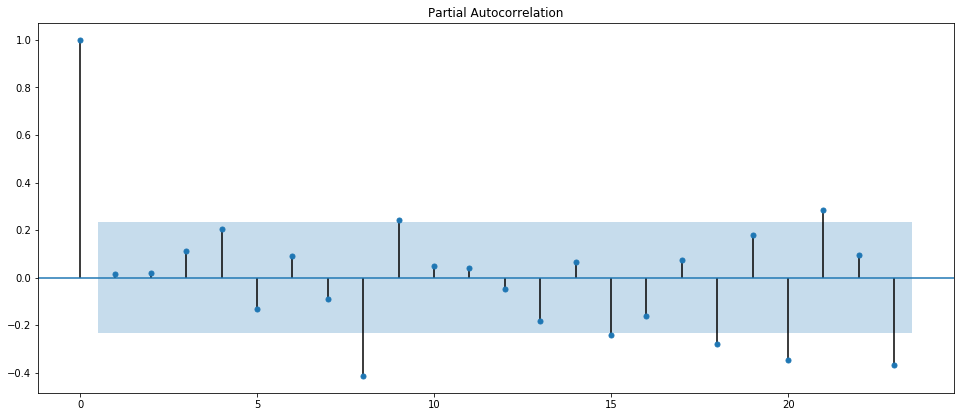

MON


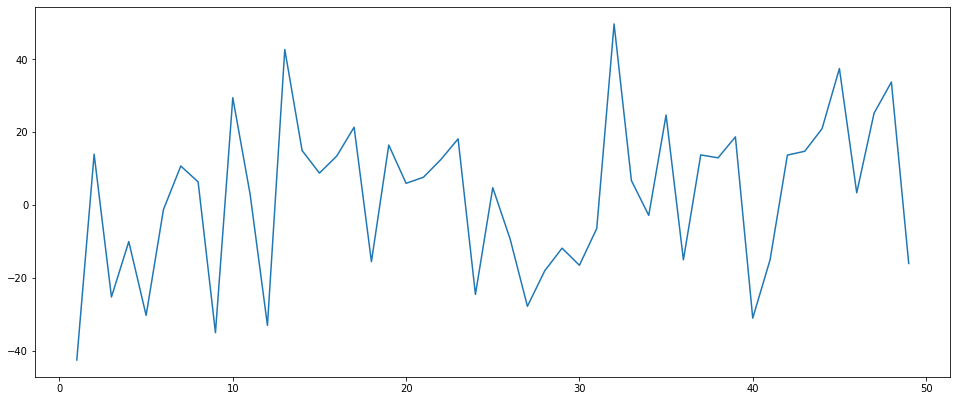

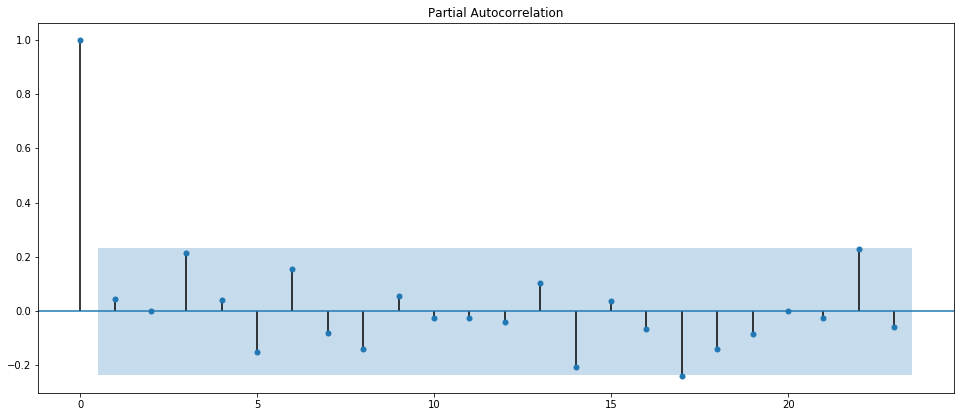

PED


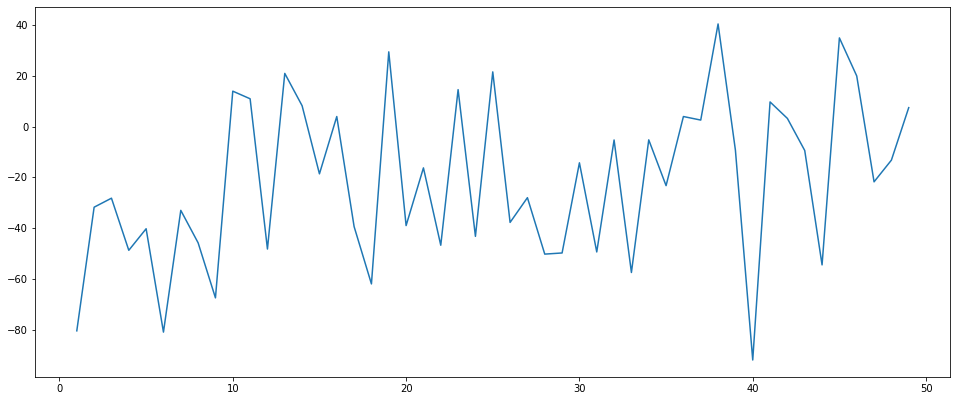

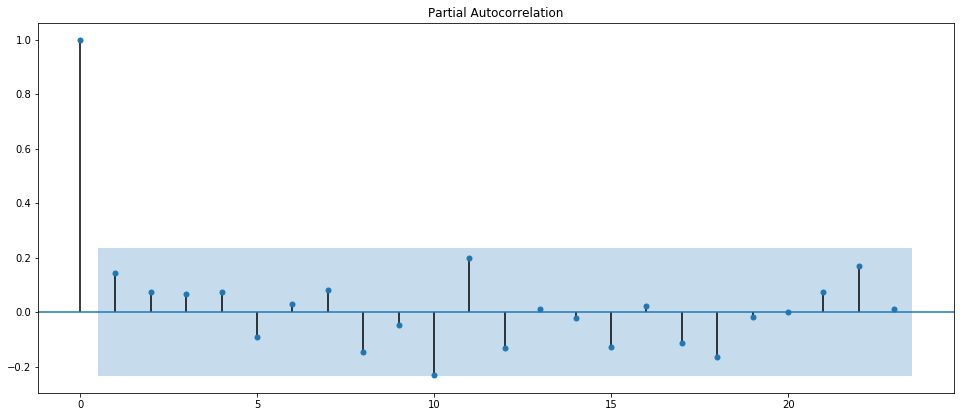

SAG


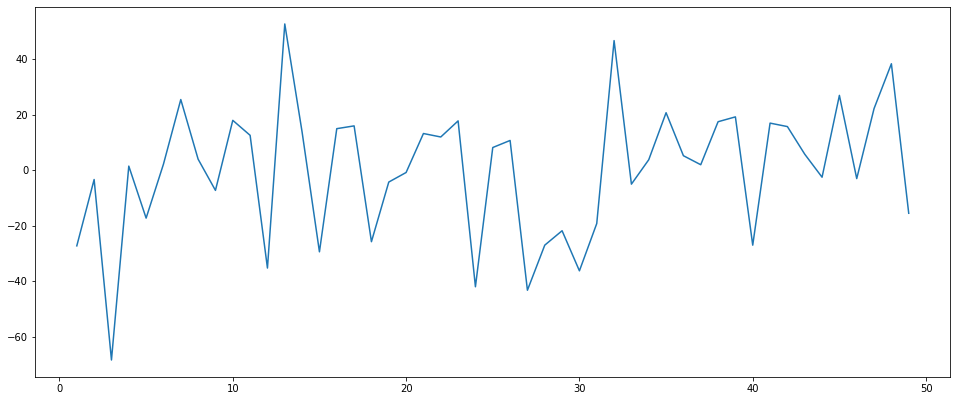

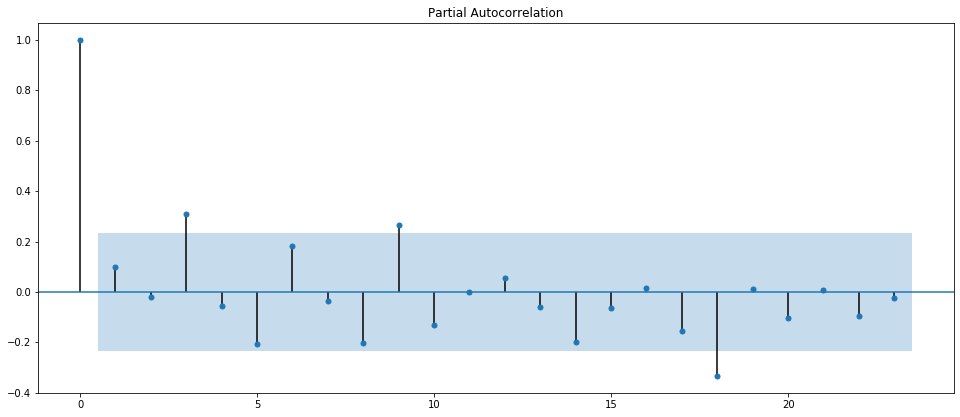

TAH


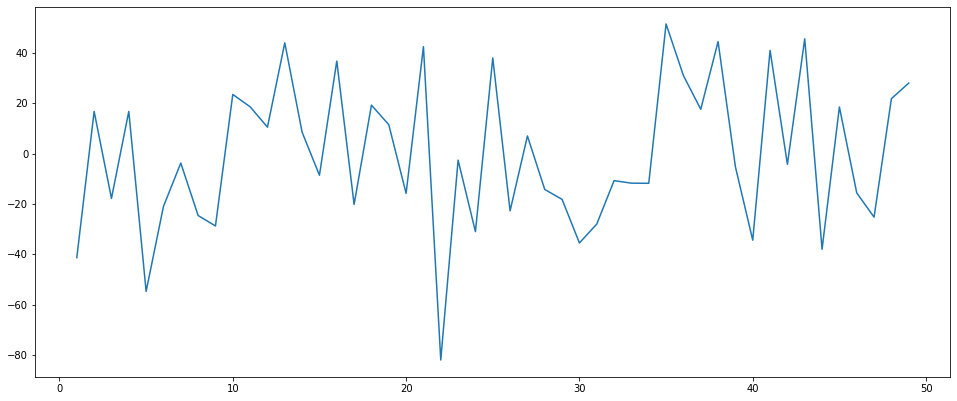

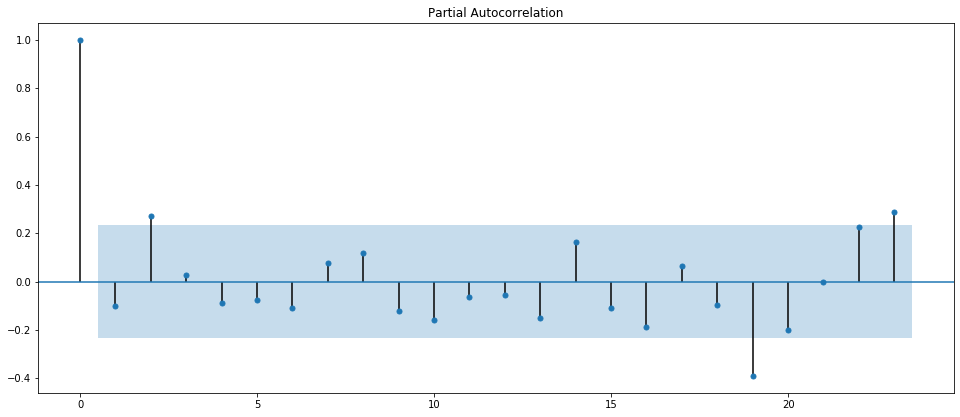

TLA


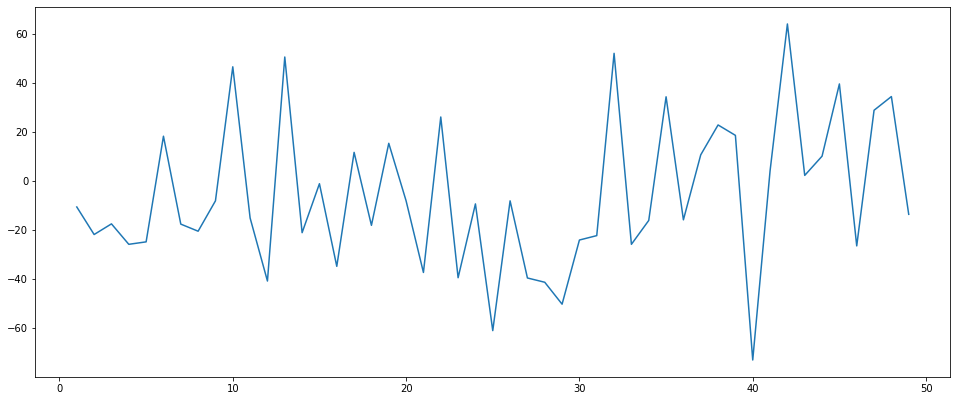

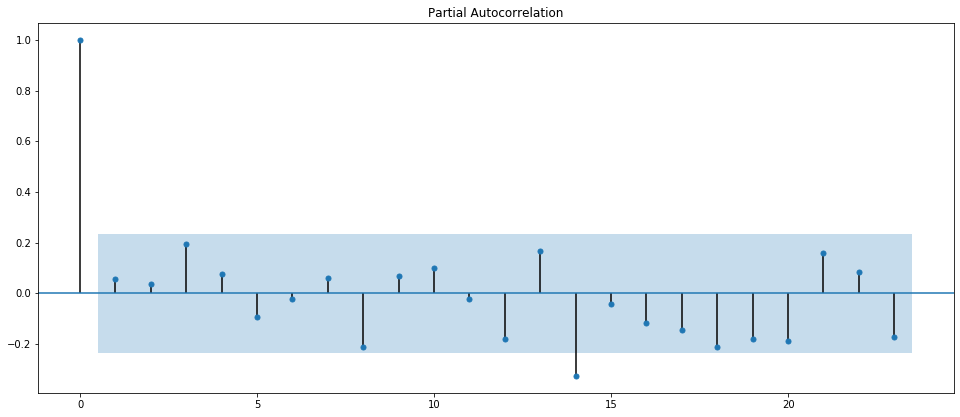

UIZ


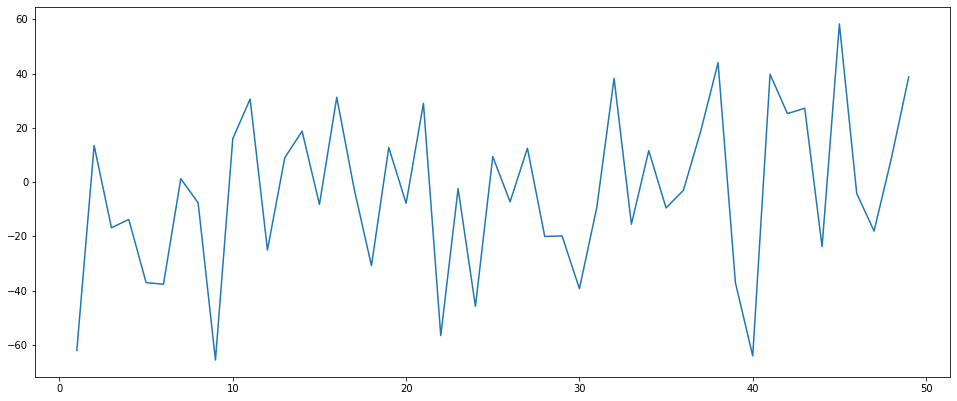

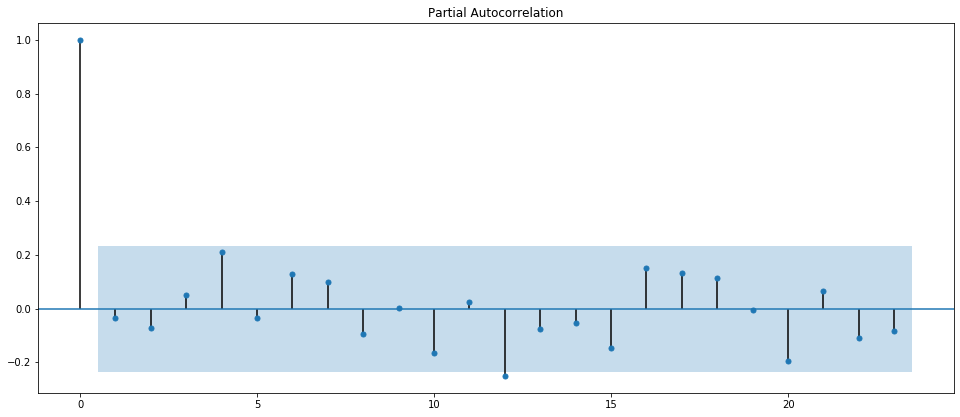

XAL


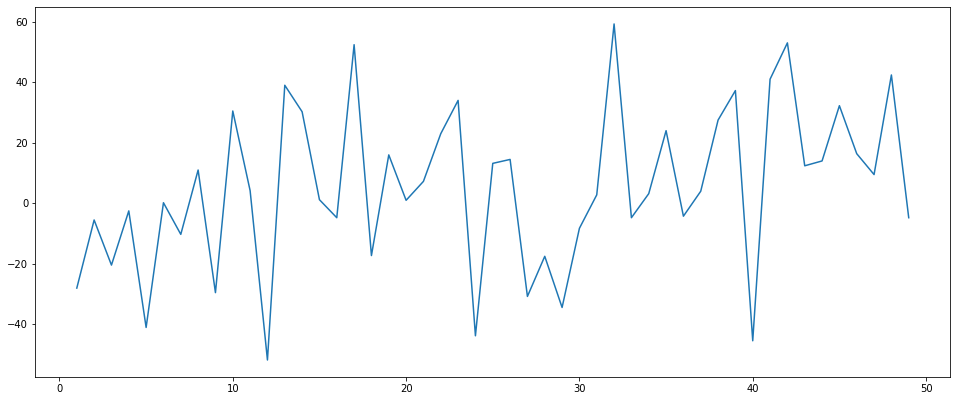

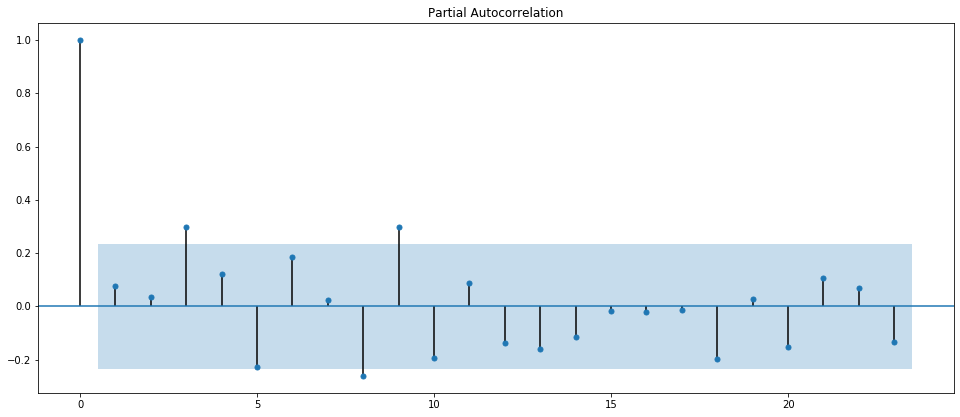

In [8]:

for c in groupedmean.columns[0:11]:
    print(c)
    y = groupedmean[c]
    plt.plot(y[:int(len(y)*tr) ])
    #autocorrelation_plot(y)
    tsa.plot_pacf(y,lags = (int(len(y)/3)))
    plt.show()

## 

,CUA,FAC,MER,MON,PED,SAG,TAH,TLA,UIZ,XAL
group,,,,,,,,,,
1,-67.250000,-62.000,-56.25,-42.50,-80.500,-27.250000,-41.333333,-10.50,-62.000,-28.00
2,38.333333,-30.250,7.25,14.00,-31.750,-3.333333,16.750000,-21.75,13.500,-5.50
3,-18.000000,-39.400,-32.80,-25.20,-28.200,-68.400000,-17.800000,-17.40,-16.800,-20.40
4,-48.000000,-70.750,-10.75,-10.00,-48.750,1.500000,16.750000,-25.75,-13.750,-2.50
5,-63.000000,-34.250,-45.25,-30.25,-40.250,-17.250000,-54.750000,-24.75,-37.000,-41.00
...,...,...,...,...,...,...,...,...,...,...
66,-17.600000,-1.400,-24.00,-18.60,-37.000,-22.200000,-18.400000,6.60,-21.800,-4.20
67,-6.750000,-11.750,-34.00,-15.50,-26.000,-4.250000,-2.750000,-16.50,-18.500,-7.25
68,-13.500000,-0.250,2.50,-7.75,-11.500,-2.750000,-26.750000,10.50,4.750,-2.25


In [520]:
L = 3
y


group
1    -28.00
2     -5.50
3    -20.40
4     -2.50
5    -41.00
      ...  
66    -4.20
67    -7.25
68    -2.25
69    16.00
70     5.00
Name: XAL, Length: 70, dtype: float64

In [521]:
l = 3
ny = np.array(y)
phi = np.random.rand(l)


In [611]:
y = groupedmean["TLA"]

def f(v,y = y[:int(len(y)*tr)]):
    y = np.array(y)
    n = np.int(v[0])
    l = n
    phi = np.array(v[1:n+1])
    osa = 1

    yp = []
    yr = []
    for os in np.arange(len(y)-l-osa):
        prediction = phi.dot(y[os:os+l])
        real = ny[os+l]
        yp.append(prediction) 
        yr.append(real)
        
    return np.mean(np.abs((np.array(yp)-np.array(yr))))
    
    
    


In [612]:
import scipy as sp
from scipy.optimize import differential_evolution
import numpy as np

npr = 3
lb = [npr, -5 , -5, -5]
ub = [npr,  5 ,  5,  5]
bounds = list(map(lambda x,y: (x,y),lb,ub))
bounds



[(3, 3), (-5, 5), (-5, 5), (-5, 5)]

In [613]:
r = differential_evolution(f, bounds,args=(),strategy='best1bin',maxiter=1000,popsize=1000,tol=0.0001,mutation=(0.5,1),recombination=0.7,seed=None,callback=None,disp=True, polish=True, init='latinhypercube')

differential_evolution step 1: f(x)= 20.8807
differential_evolution step 2: f(x)= 20.8807
differential_evolution step 3: f(x)= 20.8807
differential_evolution step 4: f(x)= 20.8807
differential_evolution step 5: f(x)= 20.8729
differential_evolution step 6: f(x)= 20.6666
differential_evolution step 7: f(x)= 20.6666
differential_evolution step 8: f(x)= 20.6451
differential_evolution step 9: f(x)= 20.6451
differential_evolution step 10: f(x)= 20.6395
differential_evolution step 11: f(x)= 20.6395
differential_evolution step 12: f(x)= 20.6392
differential_evolution step 13: f(x)= 20.6306
differential_evolution step 14: f(x)= 20.6225
differential_evolution step 15: f(x)= 20.6225
differential_evolution step 16: f(x)= 20.6225
differential_evolution step 17: f(x)= 20.6203
differential_evolution step 18: f(x)= 20.6203
differential_evolution step 19: f(x)= 20.6188
differential_evolution step 20: f(x)= 20.618
differential_evolution step 21: f(x)= 20.6171
differential_evolution step 22: f(x)= 20.617

/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:1154: RuntimeWarning: invalid value encountered in true_divide
  return (parameters - self.__scale_arg1) / self.__scale_arg2 + 0.5


In [614]:
r

     fun: 20.61556528497784
     jac: array([ 0.        ,  0.7690641 ,  2.06906421, -0.75760234])
 message: 'Optimization terminated successfully.'
    nfev: 128275
     nit: 31
 success: True
       x: array([ 3.        ,  0.35441601,  0.02986967, -0.09218056])

In [615]:
y[int(len(y)*tr):]

group
50   -11.25
51    21.00
52    23.00
53   -16.75
54   -16.25
55    -3.60
56   -20.00
57    34.00
58    14.00
59    -5.00
60    -6.40
61   -38.00
62   -51.00
63   -30.00
64   -28.50
65   -12.00
66    -4.20
67    -7.25
68    -2.25
69    16.00
70     5.00
Name: XAL, dtype: float64

In [617]:
predts = []
ul = len(y[int(len(y)*tr):])
for i in np.arange(ul):
    os = i
    predts.append(np.array(y[int(len(y)*tr)-3+os:int(len(y)*tr)+os]).dot(np.array(r['x'][1:])))

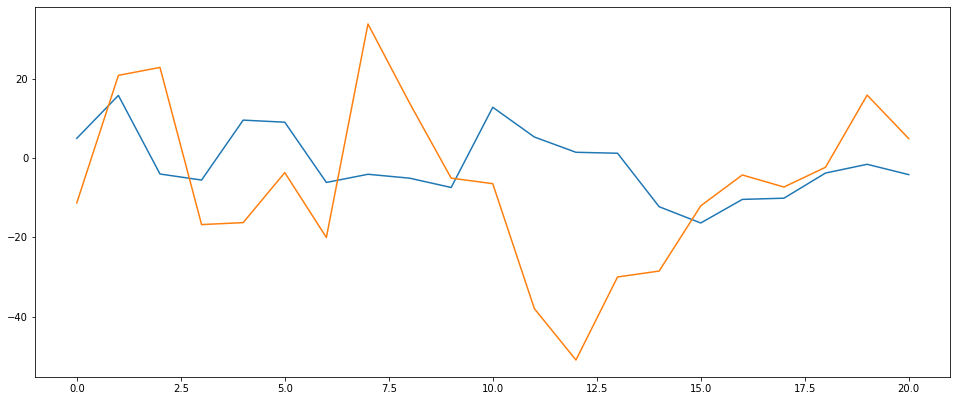

In [618]:
real = list(y[int(len(y)*tr):])

plt.plot(predts)
plt.plot(real)


In [619]:
np.mean(np.abs(np.array(predts)-np.array(real)))

17.89798685317583